In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [81]:
df= pd.read_excel("./RSN46_LYTLECR_PEL180.xlsx")

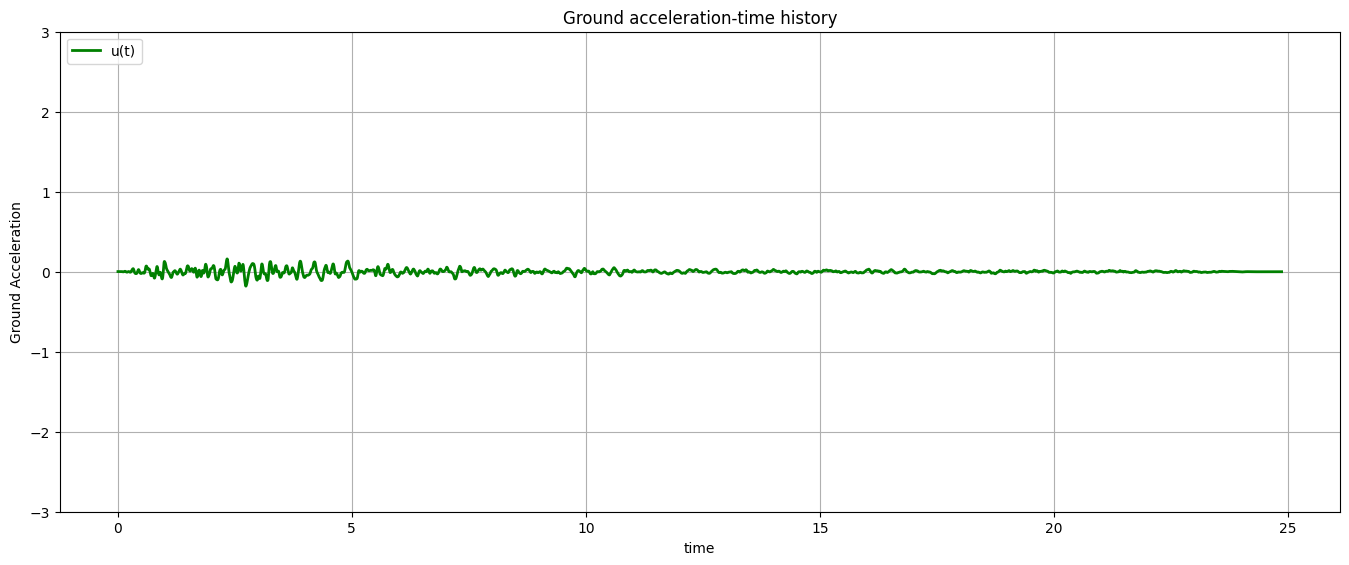

In [82]:
displacementTimeFig = plt.figure()
axes = displacementTimeFig.add_axes([0.1,0.1,2,1])
axes.set_xlabel('time')
axes.set_ylabel('Ground Acceleration')
axes.set_ylim([-3,3])
axes.plot(df['delta t (sec)'],9.81*df['Ground Acceleration (in G)'],label='u(t)',linewidth = 2,color='green',linestyle ='-')
axes.set_title('Ground acceleration-time history')
axes.legend(loc='upper left')
plt.grid()
plt.show()

In [83]:

peakGroundAcceleration= np.max(df['Ground Acceleration (in G)'])
print(peakGroundAcceleration,"g")

0.01628757 g


In [84]:
#pseudo spectra acceleration
m = 2
g= 9.81
df["Force"] = -m*df["Ground Acceleration (in G)"]*g
df.head()


,delta t (sec),Ground Acceleration (in G),Force
0,0.005,0.000194,-0.003809
1,0.010,0.000196,-0.003855
2,0.015,0.000200,-0.003917
3,0.020,0.000205,-0.004016
4,0.025,0.000212,-0.004161


CENTRAL DIFFERENCE ALGORITHM

In [74]:
# Initializing vectors of known quantities
U = [0]*df.shape[0]
V = [0]*df.shape[0]
A = [0]*df.shape[0]
P = df['Force']
delT = 0.01
P_hat =[0]*df.shape[0]

c, k =  10, 1000

# Implementing the Central Difference Algorithm
U[-1]= U[0]- delT*V[0]+ 0.5*A[0]*delT**2
k_hat = m/delT**2 + c/(2*delT)
a = m/delT**2 - c/(2*delT)
b = k - 2*m/delT**2

for i in range(0,df.shape[0]-1):
    P_hat[i]= df["Force"][i]-a*U[i-1]-b*U[i]
    U[i+1]= P_hat[i]/k_hat
    V[i] = (U[i+1] - U[i-1])/(2*delT)
    A[i] = (P[i] - c*V[i] - k*U[i])/m


NEWMARKS METHOD

In [85]:
# Initial calculations
A[0] = (P[0] - c*V[0] - k*U[0])/m
U[-1] = U[0] - delT * V[0] + (delT**2 / 2) * A[0] 
a1 = (m / (delT**2)) + (c / (2 * delT))
a2 = 4 / delT + c
a3 = m / delT
k_hat = k + a1
m_hat = m

# Number of time steps

U = [0]*df.shape[0]
V = [0]*df.shape[0]
A = [0]*df.shape[0]
p_hat = [0]*df.shape[0]
P = [0]*df.shape[0]


for i in range(0,df.shape[0]-1):
    p_hat[i+1] = P[0] + a2 * U[i] + a3 * V[i] + m_hat * A[i]
    U[i+1] = p_hat[i+1] / k_hat
    V[i+1] = (2 / delT) * (U[i+1] - U[i]) - V[i]
    A[i+1] = (4 / (delT**2)) * (U[i+1] - 2 * U[i] + U[i-1])


In [86]:
df['Displacement']= U
df['Velocity']= V
df['Acceleration']= A

#declare scale factors.

In [87]:
df.head()

,delta t (sec),Ground Acceleration (in G),Force,Displacement,Velocity,Acceleration
0,0.005,0.000194,-0.003809,0.0,0.0,0.0
1,0.010,0.000196,-0.003855,0.0,0.0,0.0
2,0.015,0.000200,-0.003917,0.0,0.0,0.0
3,0.020,0.000205,-0.004016,0.0,0.0,0.0
4,0.025,0.000212,-0.004161,0.0,0.0,0.0


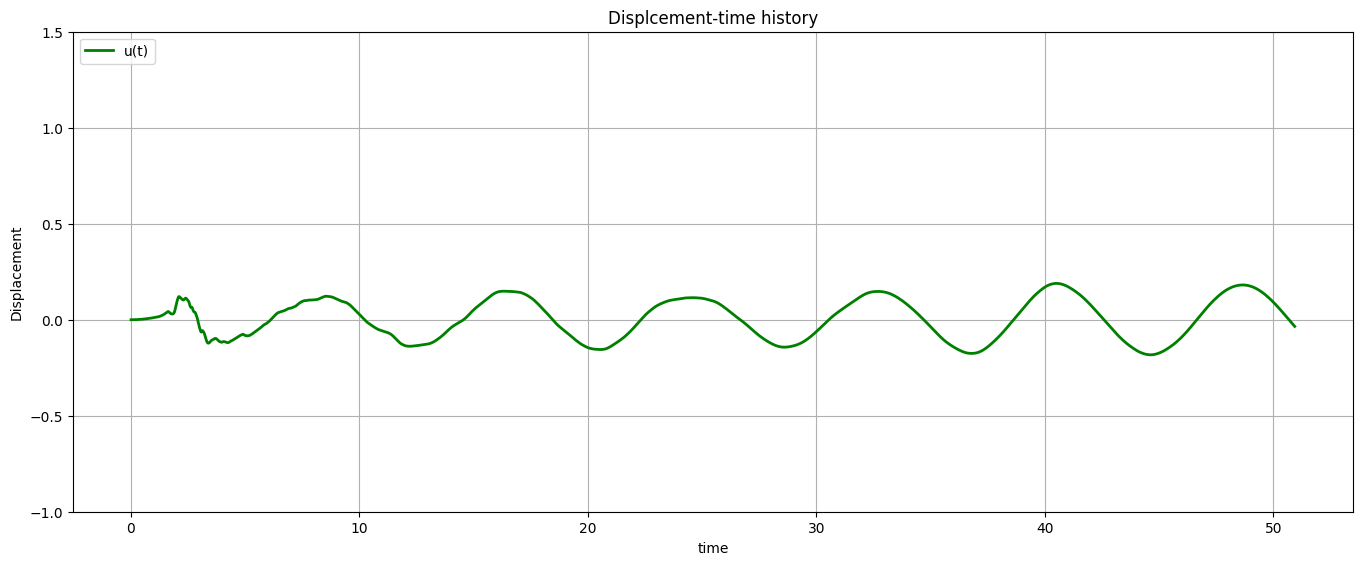

In [77]:
displacementTimeFig = plt.figure()
axes = displacementTimeFig.add_axes([0.1,0.1,2,1])
axes.set_xlabel('time')
axes.set_ylabel('Displacement')
axes.set_ylim([-1,1.5])
axes.plot(df['delta t (sec)'],10*df['Displacement'],label='u(t)',linewidth = 2,color='green',linestyle ='-')
axes.set_title('Displcement-time history')
axes.legend(loc='upper left')
plt.grid()
plt.show()

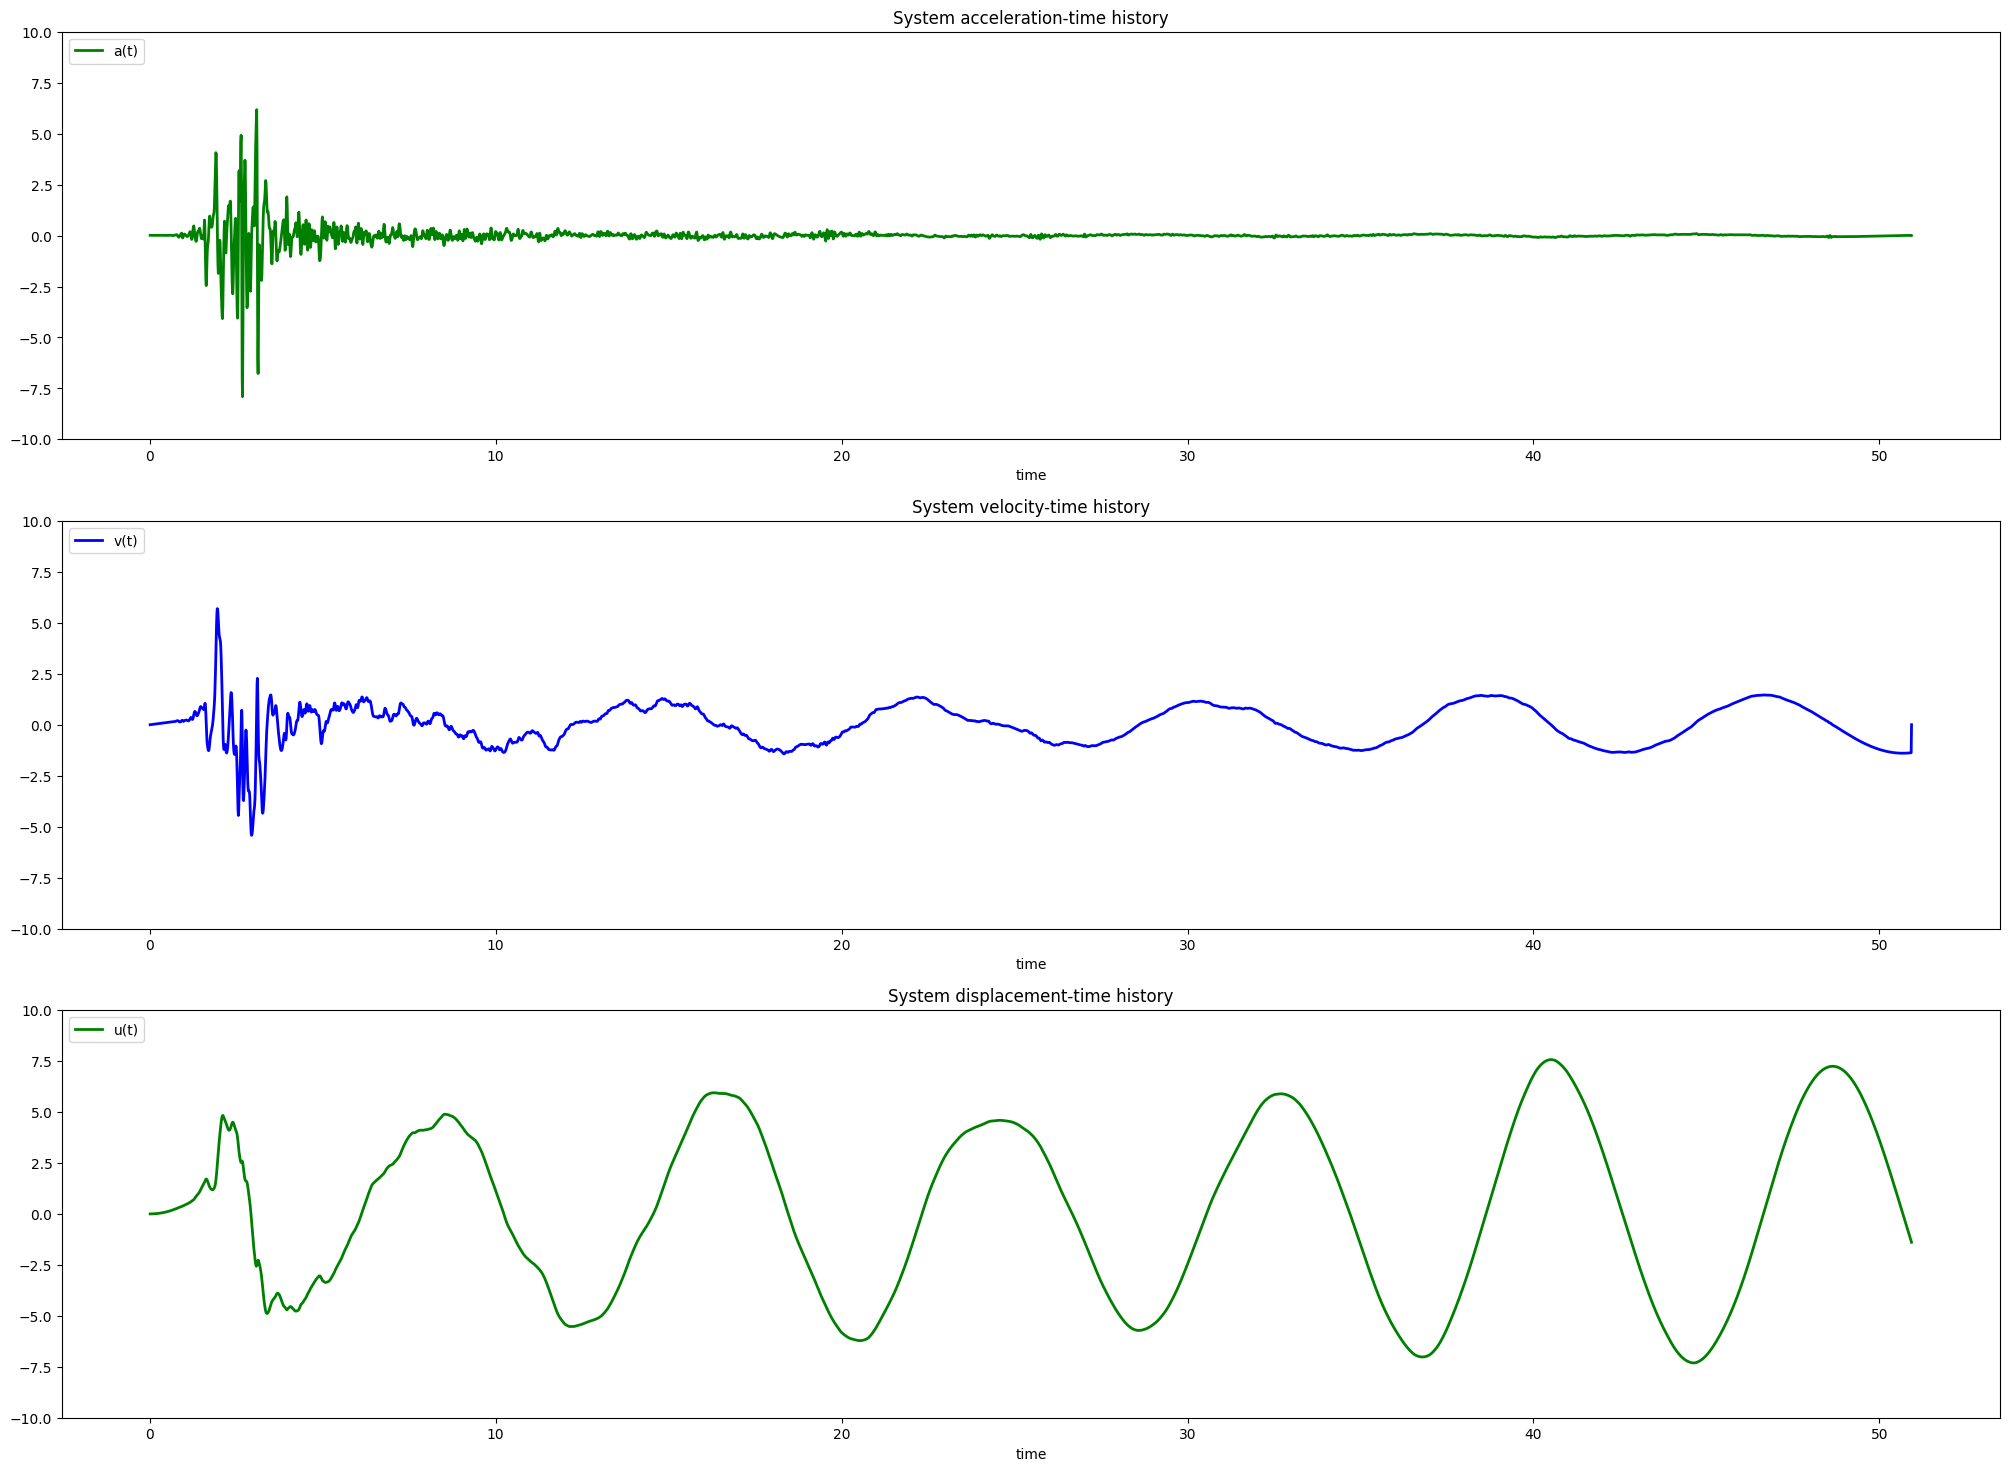

In [78]:
fig, axes = plt.subplots(figsize=(25,18),nrows=3,ncols=1) 
#velocityTimeFig = plt.figure()
#axes = velocityTimeFig.add_axes([0.1,0.1,2,1])
axes[0].set_xlabel('time')
axes[0].set_ylim([-10,10])
axes[1].set_xlabel('time')
axes[1].set_ylim([-10,10])
axes[2].set_xlabel('time')
axes[2].set_ylim([-10,10])


axes[0].plot(df['delta t (sec)'],5*df['Acceleration'],label='a(t)',linewidth = 2,color='green',linestyle ='-')
axes[1].plot(df['delta t (sec)'],100*df['Velocity'],label='v(t)',linewidth = 2,color='blue',linestyle ='-')
axes[2].plot(df['delta t (sec)'],400*df['Displacement'],label='u(t)',linewidth = 2,color='green',linestyle ='-')


axes[0].set_title('System acceleration-time history')
axes[0].legend(loc='upper left')

axes[1].set_title('System velocity-time history')
axes[1].legend(loc='upper left')

axes[2].set_title('System displacement-time history')
axes[2].legend(loc='upper left')
plt.show()





PSEUDO-SPECTRA ACCELERATION

In [56]:
Tn = np.arange(0,4,1)
def calculateMass():
   M=[]
   for i in Tn:
      m = k*i/4*np.pi**2
      M.append(m)
   return M
mass= calculateMass()
pseudo_spectr=[]
for m in mass:
    w_n = np.sqrt(m/k)
    pseudo = peakGroundAcceleration*w_n**2
    pseudo_spectr.append(pseudo)
    

In [ ]:
velocityTimeFig = plt.figure()
axes = velocityTimeFig.add_axes([0.1,0.1,2,1])
axes.set_xlabel('time')
#axes.set_ylabel('Velocity')
axes.set_ylim([-10,10])
axes.plot(pseudo_spectr,label='u(t)',linewidth = 2,color='green',linestyle ='-')
#axes.plot(df['delta t (sec)'],1000*df['Velocity'],label='v(t)',linewidth = 2,color='blue',linestyle ='.')

axes.set_title('Free vibration of a system without damping')
axes.legend(loc='upper left')
plt.grid()
plt.show()

In [58]:
pseudo_spectr

[0.0, 0.39666063458033146, 0.7933212691606629, 1.1899819037409942]